### Exercise 30

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
matrix = np.arange(1,10).reshape(3,3)
matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [3]:
matrix.sum()

45

In [4]:
max_value = np.max(matrix)
max_indices = np.unravel_index(np.argmax(matrix), matrix.shape)
print("Maximum value:", max_value)
print("Indices (row, column):", max_indices)

Maximum value: 9
Indices (row, column): (2, 2)


In [30]:
matrix.shape

(3, 3)

In [8]:
matrix.shape

(3, 3)

In [16]:
second_column = matrix[:, 1]
print(second_column)

[2 5 8]


In [27]:
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        if matrix[i, j] % 2 == 0:  # Check if the element is even
            matrix[i, j] = -1      # Replace with -1

print(matrix)

[[ 1 -1  3]
 [-1  5 -1]
 [ 7 -1  9]]


In [23]:
reshaped_array = matrix.flatten()
print(reshaped_array)

[ 1 -1  3 -1  5 -1  7 -1  9]


In [30]:
matrix = np.arange(1,10).reshape(3,3)
submatrix = matrix[1:,1:]
submatrix

array([[5, 6],
       [8, 9]])

In [34]:
mean_value = submatrix.mean()
print(f'mean is: {mean_value}')

mean is: 7.0


### Exercise 31

In [9]:
df = pd.read_csv('student.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
print(df.shape)

(395, 33)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    float64
 3   address     389 non-null    object 
 4   famsize     391 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        391 non-null    object 
 9   Fjob        392 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    394 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    386 non-null    float64
 15  schoolsup   390 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        388 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

In [12]:
df.isnull().sum()

school        0
sex           6
age           6
address       6
famsize       4
Pstatus       0
Medu          0
Fedu          0
Mjob          4
Fjob          3
reason        0
guardian      1
traveltime    0
studytime     0
failures      9
schoolsup     5
famsup        0
paid          7
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [13]:
df.dropna(inplace= True)
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [14]:
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [15]:
print(df['age'].mean())

16.732984293193716


<Axes: >

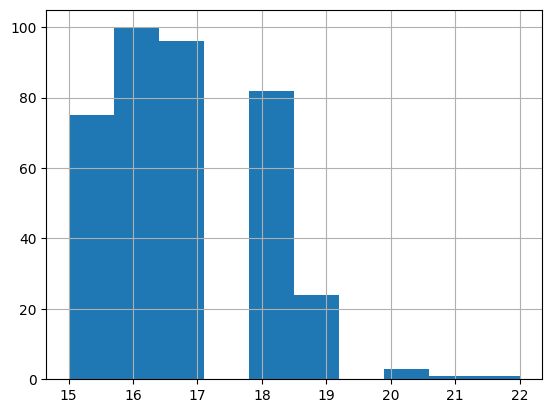

In [16]:
df['age'].hist()

<Axes: >

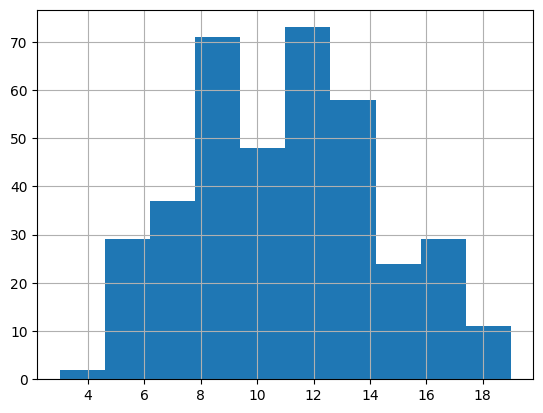

In [17]:
df['G1'].hist()

In [18]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 17
Integer variables: 14
Float variables: 2


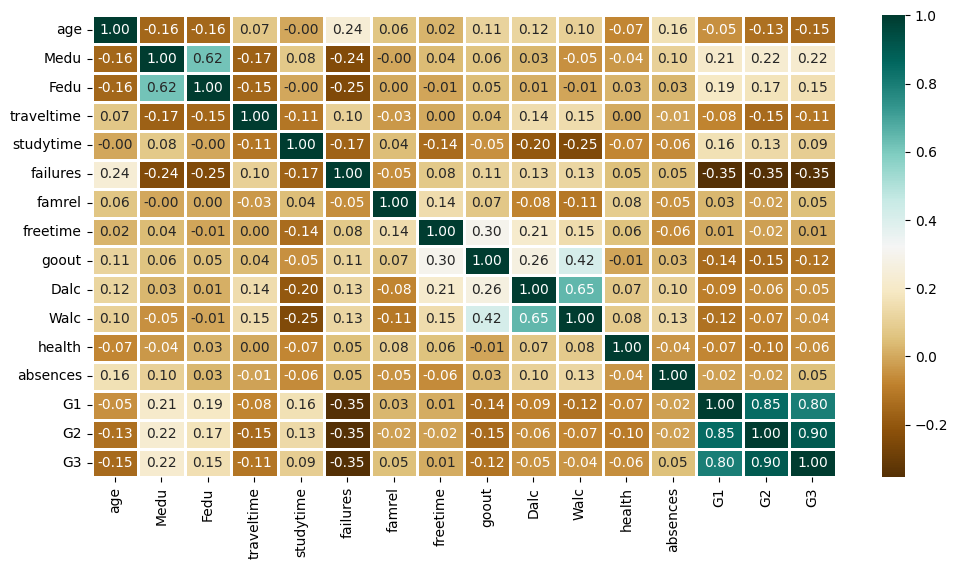

In [19]:
# Drop columns with 'object' data type
df1 = df.drop(columns=[col for col in df.columns if df[col].dtype == 'object'], axis=1)

# Plot correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df1.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)
plt.show()

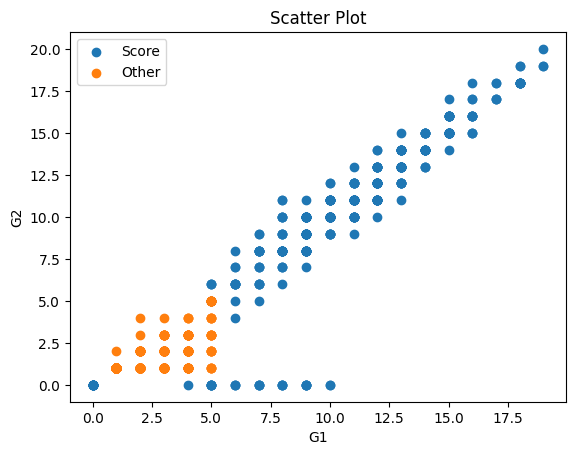

In [20]:
plt.scatter(df['G2'], df['G3'], label='Score')
plt.scatter(df['Walc'], df['Dalc'], label='Other')
# Set labels and title

plt.xlabel('G1')
plt.ylabel('G3')
plt.title('Scatter Plot')

# Show the plot
plt.legend()
plt.show()

<Axes: ylabel='count'>

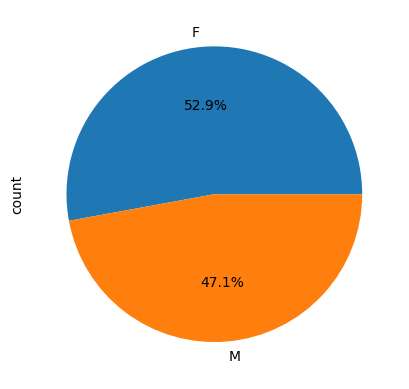

In [21]:
df.sex.value_counts().plot(kind="pie", autopct='%1.1f%%')

In [22]:
sns.set_theme(style="darkgrid")

C:\Users\Meisam\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Meisam\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Meisam\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Meisam\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

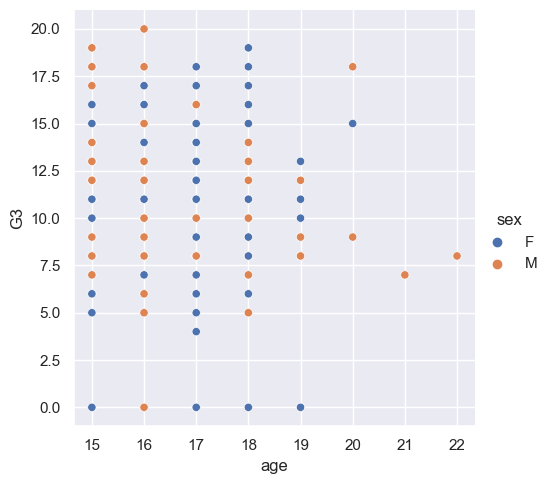

In [26]:
sns.relplot(
    data=df, y="G3", x="age",hue='sex'
)

C:\Users\Meisam\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Meisam\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Meisam\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Meisam\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

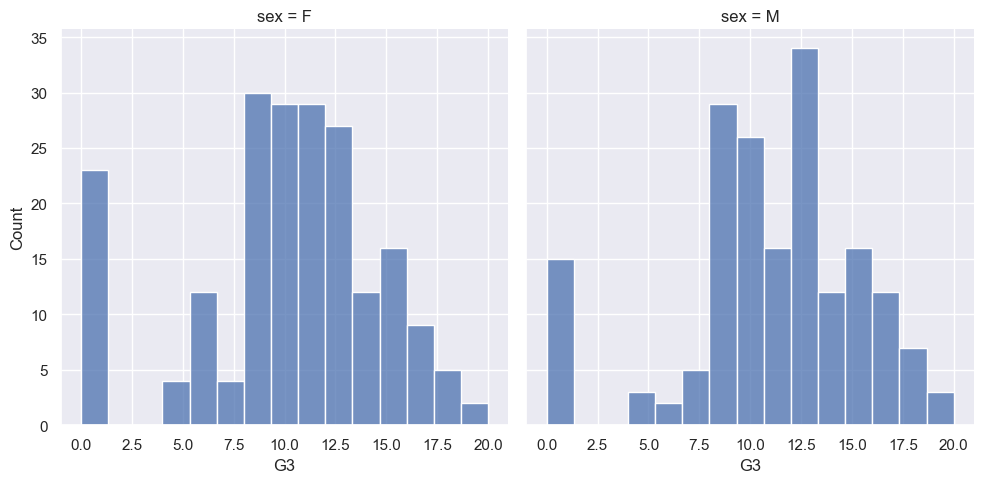

In [88]:
sns.displot(df, x="G3", col="sex")

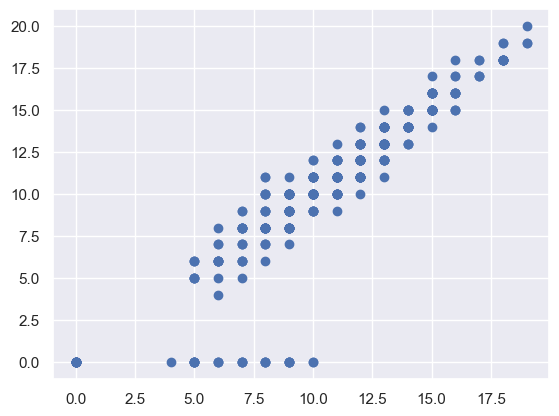

In [28]:
plt.scatter(df['G2'], df['G3'])
plt.show()

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Select the features (independent variables) and the target variable
features = df1.drop(['G3'], axis=1)
target = df1['G3']

# Perform one-hot encoding for categorical variables (if needed)
# features_encoded = pd.get_dummies(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1, target, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.5218802278553487
